In [1]:
#Bacic libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the data

In [2]:
df=pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# data exploration

In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df['isFlaggedFraud'].unique()

array([0], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


<Axes: xlabel='type', ylabel='count'>

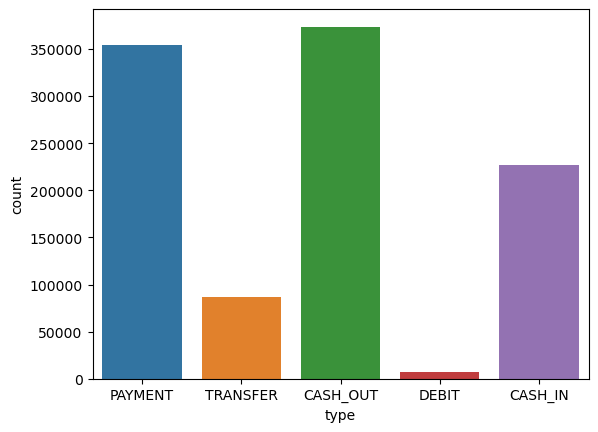

In [7]:
sns.countplot(x='type', data=df)

In [8]:
df['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_19280\3983878547.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

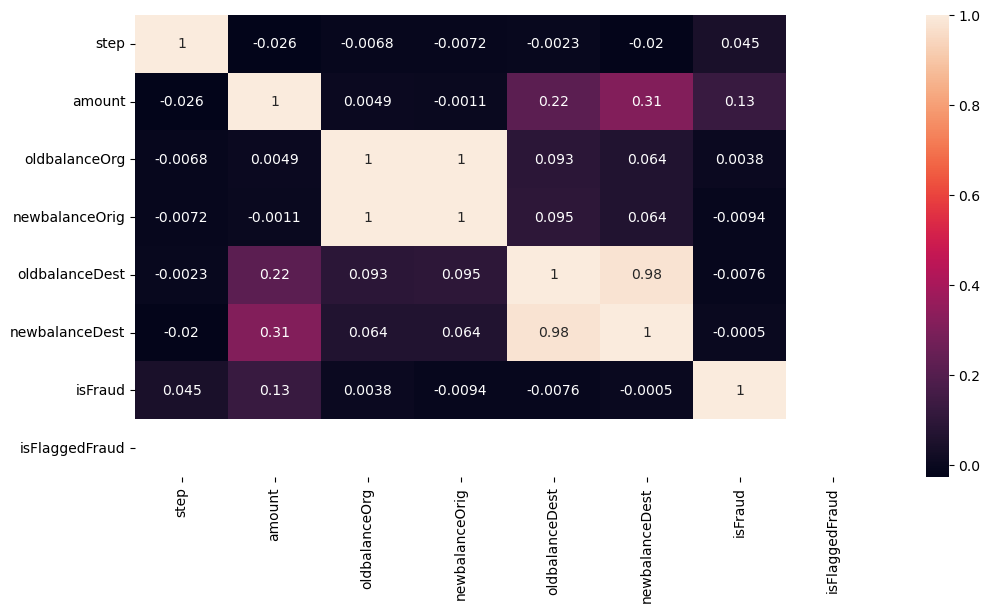

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

# Encoding the categorical data

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:

df['type']= le.fit_transform(df['type'])
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
X=df.drop(['isFraud',"nameOrig",'nameDest','isFlaggedFraud'],axis=1)
y=df['isFraud']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
# feature selection 
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([9.89435061e-03, 5.90372482e-02, 1.75975692e-03, 1.30783504e-03,
       5.38804011e-04, 1.63348521e-04, 4.65057577e-05])

In [15]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

type              0.059037
step              0.009894
amount            0.001760
oldbalanceOrg     0.001308
newbalanceOrig    0.000539
oldbalanceDest    0.000163
newbalanceDest    0.000047
dtype: float64

# Model building

In [16]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [17]:
y_pred=log_model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, classification_report

In [27]:
accuracy_score(y_test,y_pred)


0.9989604956560163

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.55      0.33      0.42       349

    accuracy                           1.00    314573
   macro avg       0.78      0.67      0.71    314573
weighted avg       1.00      1.00      1.00    314573



In [29]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [30]:
svm_model=SVC(kernel='rbf')
svm_model.fit(X_train,y_train)

SVC()

In [31]:
y_pred2=svm_model.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred2)


0.9991003678001609

In [34]:
tree_model=RandomForestClassifier(n_estimators=7)
tree_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=7)

In [35]:
y_pred3=tree_model.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred3)

0.9997361502735455

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)

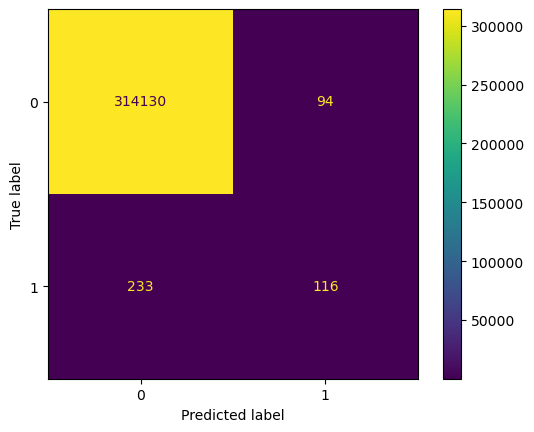

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()